In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline

# Loard Dataset

In [88]:
df = pd.read_csv('./Data/raw/student_depression_dataset.csv')

In [89]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [91]:
df.shape

(27901, 18)

In [92]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [93]:
#Finding duplicate columns
df.loc[df.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [94]:
#create a copy of the DataFrame
# and add the last row of the original data again as a new row in the copied dataset
df_copy = df.copy()
df_copy.loc[len(df)] = df.loc[len(df) - 1]

In [95]:
#Finding duplicate columns in the copied DataFrame
df_copy.loc[df_copy.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27901,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [96]:
#Shows the last 5 rows of the copied dataset
df_copy.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1
27901,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


# Data Cleaning & Preprocessing

## Convert and Clean Data Type

In [97]:
# Convert 'Depression' to integer (if not already)
df['Depression'] = df['Depression'].astype(int)

# Convert columns that should be categorical
cat_cols = ['Gender', 'City', 'Profession', 'Degree',
            'Have you ever had suicidal thoughts ?', 
            'Family History of Mental Illness']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Check unique values in some columns to decide cleaning strategy
print("Unique values in 'Sleep Duration':", df['Sleep Duration'].unique())
print("Unique values in 'Financial Stress':", df['Financial Stress'].unique())

Unique values in 'Sleep Duration': ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Unique values in 'Financial Stress': ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [98]:
# Define a function to extract numeric hours from Sleep Duration column
def extract_hours(s):
    # Find a number (including decimals)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

df['Sleep Duration'] = df['Sleep Duration'].apply(extract_hours)

# Convert Financial Stress to categorical if it represents levels (e.g., Low, Medium, High)
df['Financial Stress'] = df['Financial Stress'].astype('category')

# Verify changes
print(df[['Sleep Duration', 'Financial Stress']].head())

   Sleep Duration Financial Stress
0             5.0              1.0
1             5.0              2.0
2             5.0              1.0
3             7.0              5.0
4             5.0              1.0


## Check for missing values

In [99]:
# Display missing values per column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64


In [100]:
#If there are missing values, fill them with the median
for col in ['Sleep Duration']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [101]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


# Exploratory Data Analysis

## Overall Distribution of the target variable 'Depression'

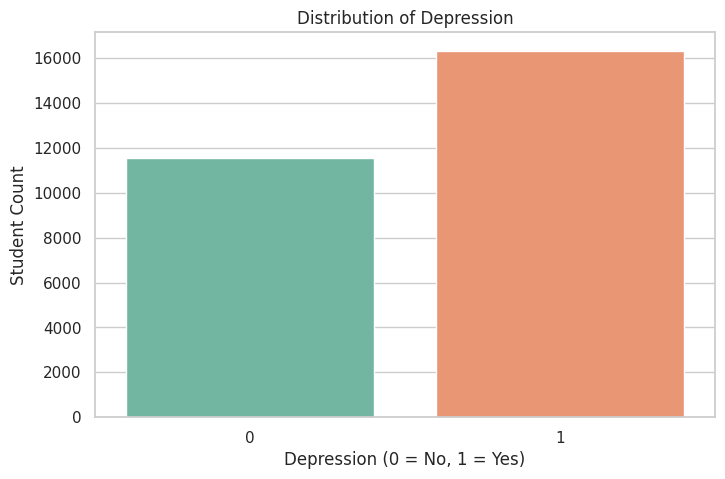

In [102]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Depression', data=df, palette="Set2")
plt.title("Distribution of Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Student Count")
plt.show()

## Visual Analysis of Depression Distribution Across Categorical Features

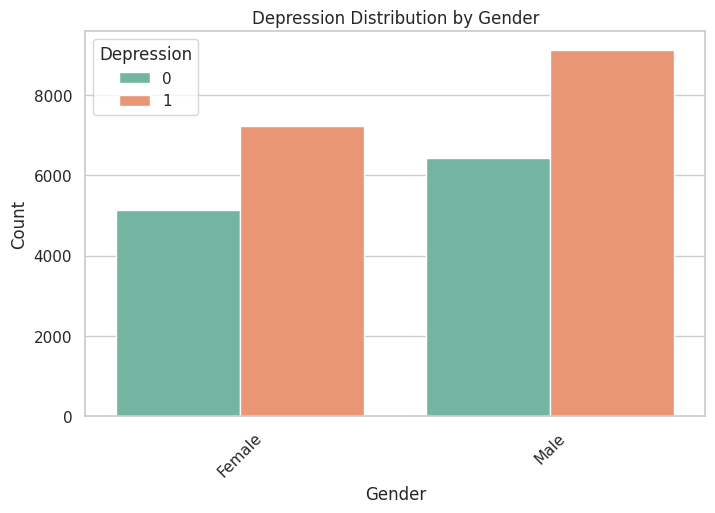

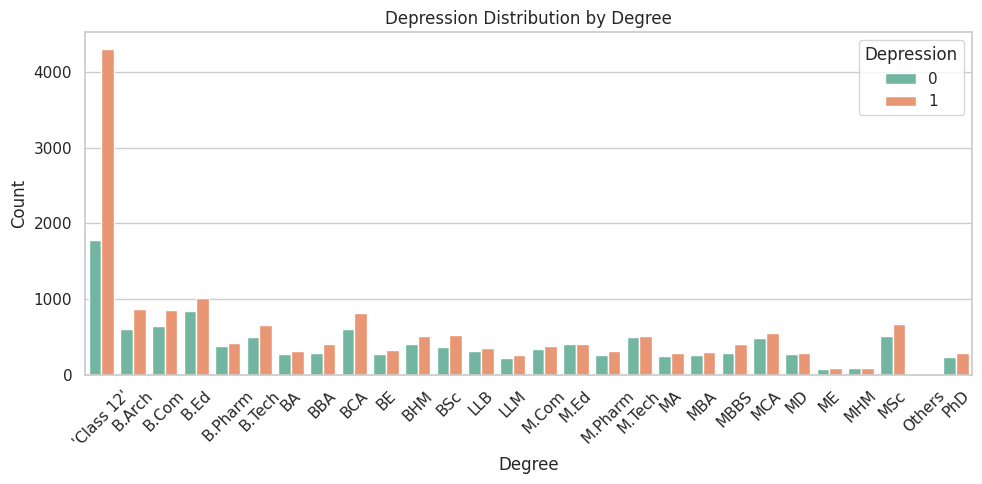

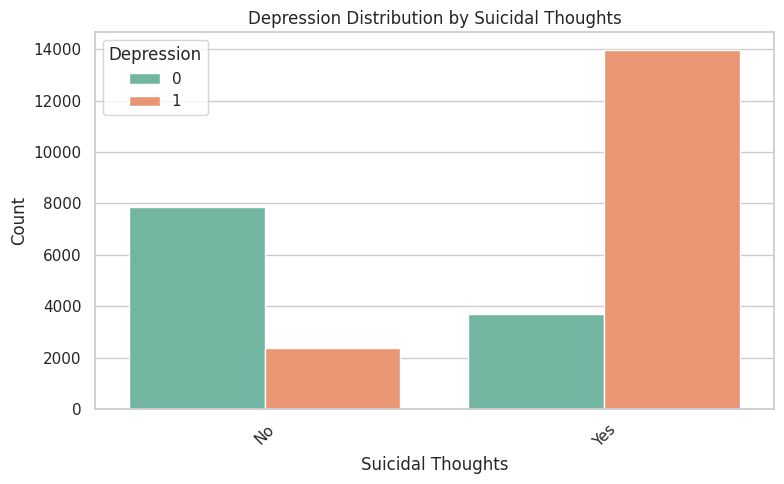

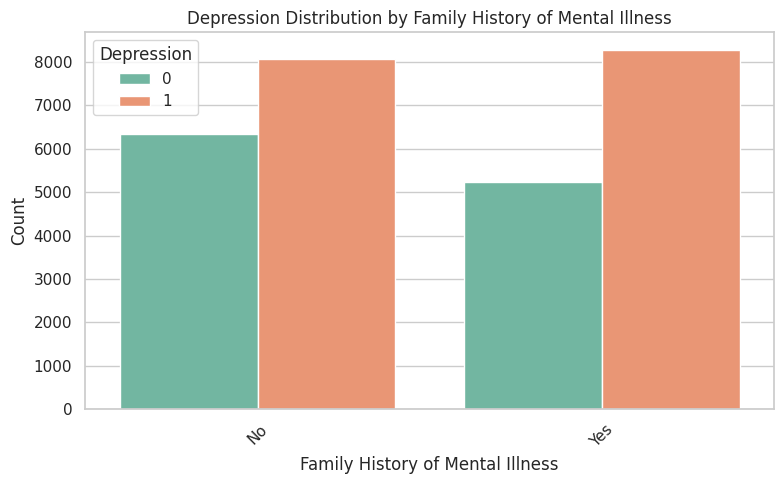

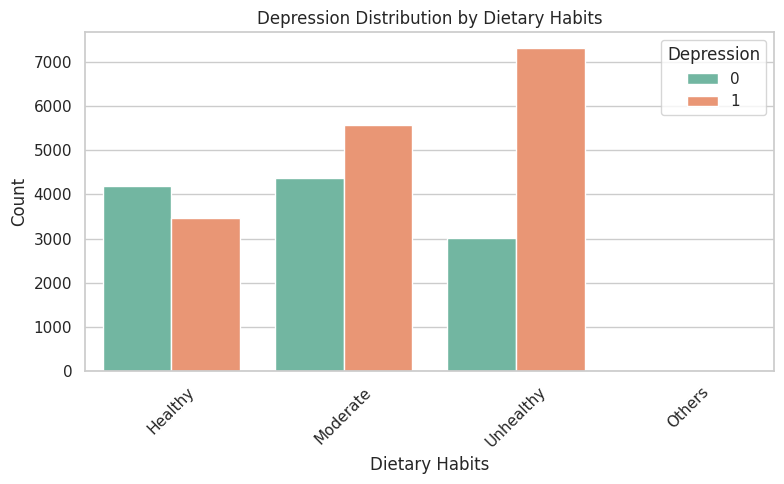

In [103]:
#Gender
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Depression")

#Degree
plt.figure(figsize=(10, 5))
sns.countplot(x='Degree', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Degree")
plt.xlabel("Degree")
plt.ylabel("Count") 
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.tight_layout()

#Suicidal Thoughts
plt.figure(figsize=(8, 5))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Suicidal Thoughts")       
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.tight_layout()

#Family History of Mental Illness
plt.figure(figsize=(8, 5))
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Family History of Mental Illness")    
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.tight_layout()  


#Dietary Habits
plt.figure(figsize=(8, 5))
sns.countplot(x='Dietary Habits', hue='Depression', data=df, palette="Set2")
plt.title("Depression Distribution by Dietary Habits")
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

## Distribution of Numerical Features

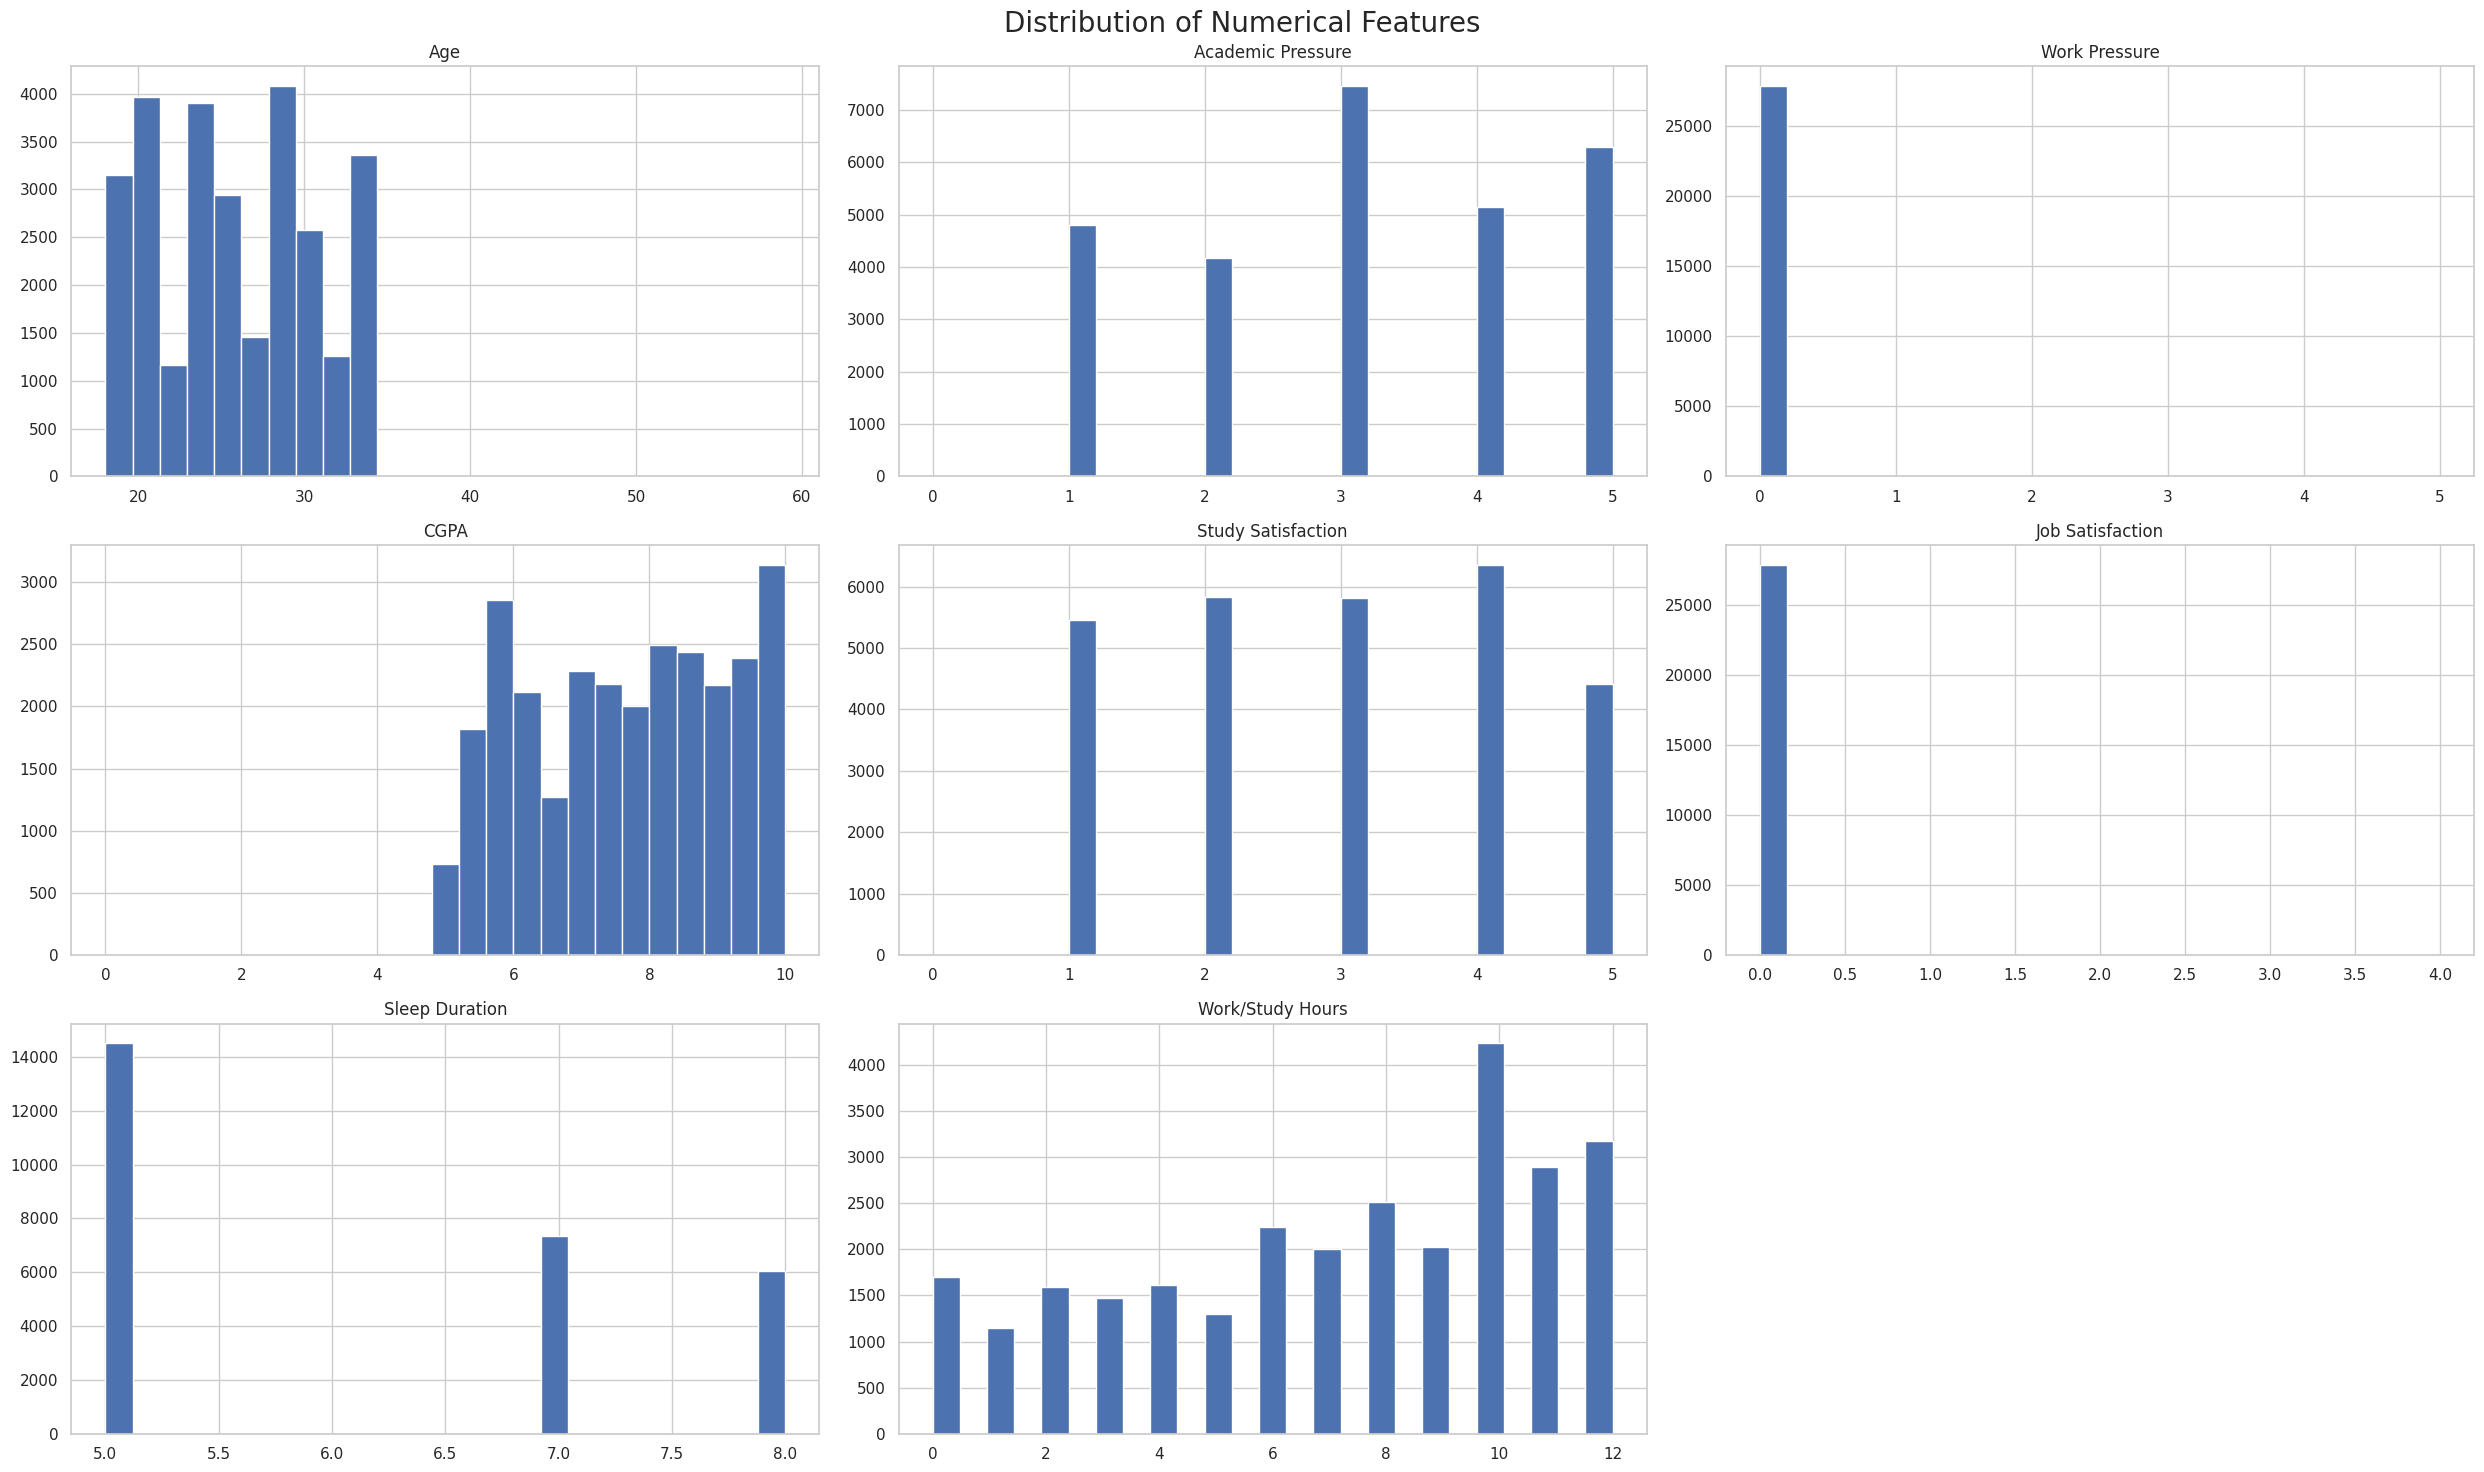

In [104]:
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Financial Stress',
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
df[num_features].hist(bins=25, figsize=(25,15))
plt.suptitle("Distribution of Numerical Features", fontsize=20)
plt.xlabel("Value", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.subplots_adjust(top=0.9)  # Adjust the top to make room for the title
plt.tight_layout()  
plt.show()


## Correlation Heatmap

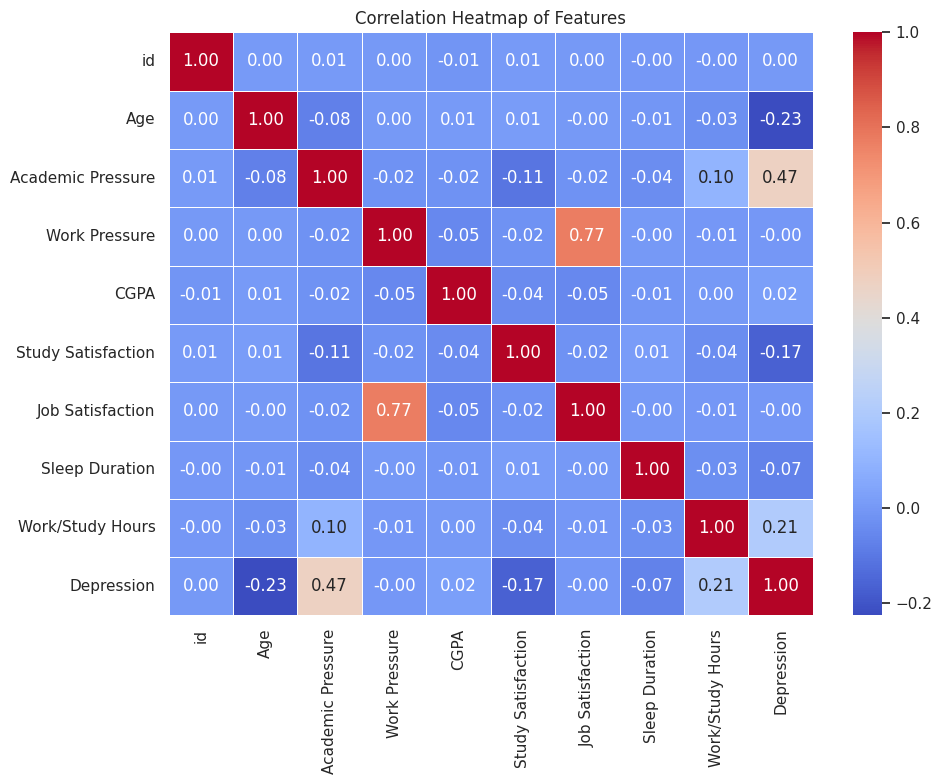

In [105]:
numerical_df=df.select_dtypes(include=['number'])
corr=numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

## Pairplot of Numerical Features

<Figure size 2000x1400 with 0 Axes>

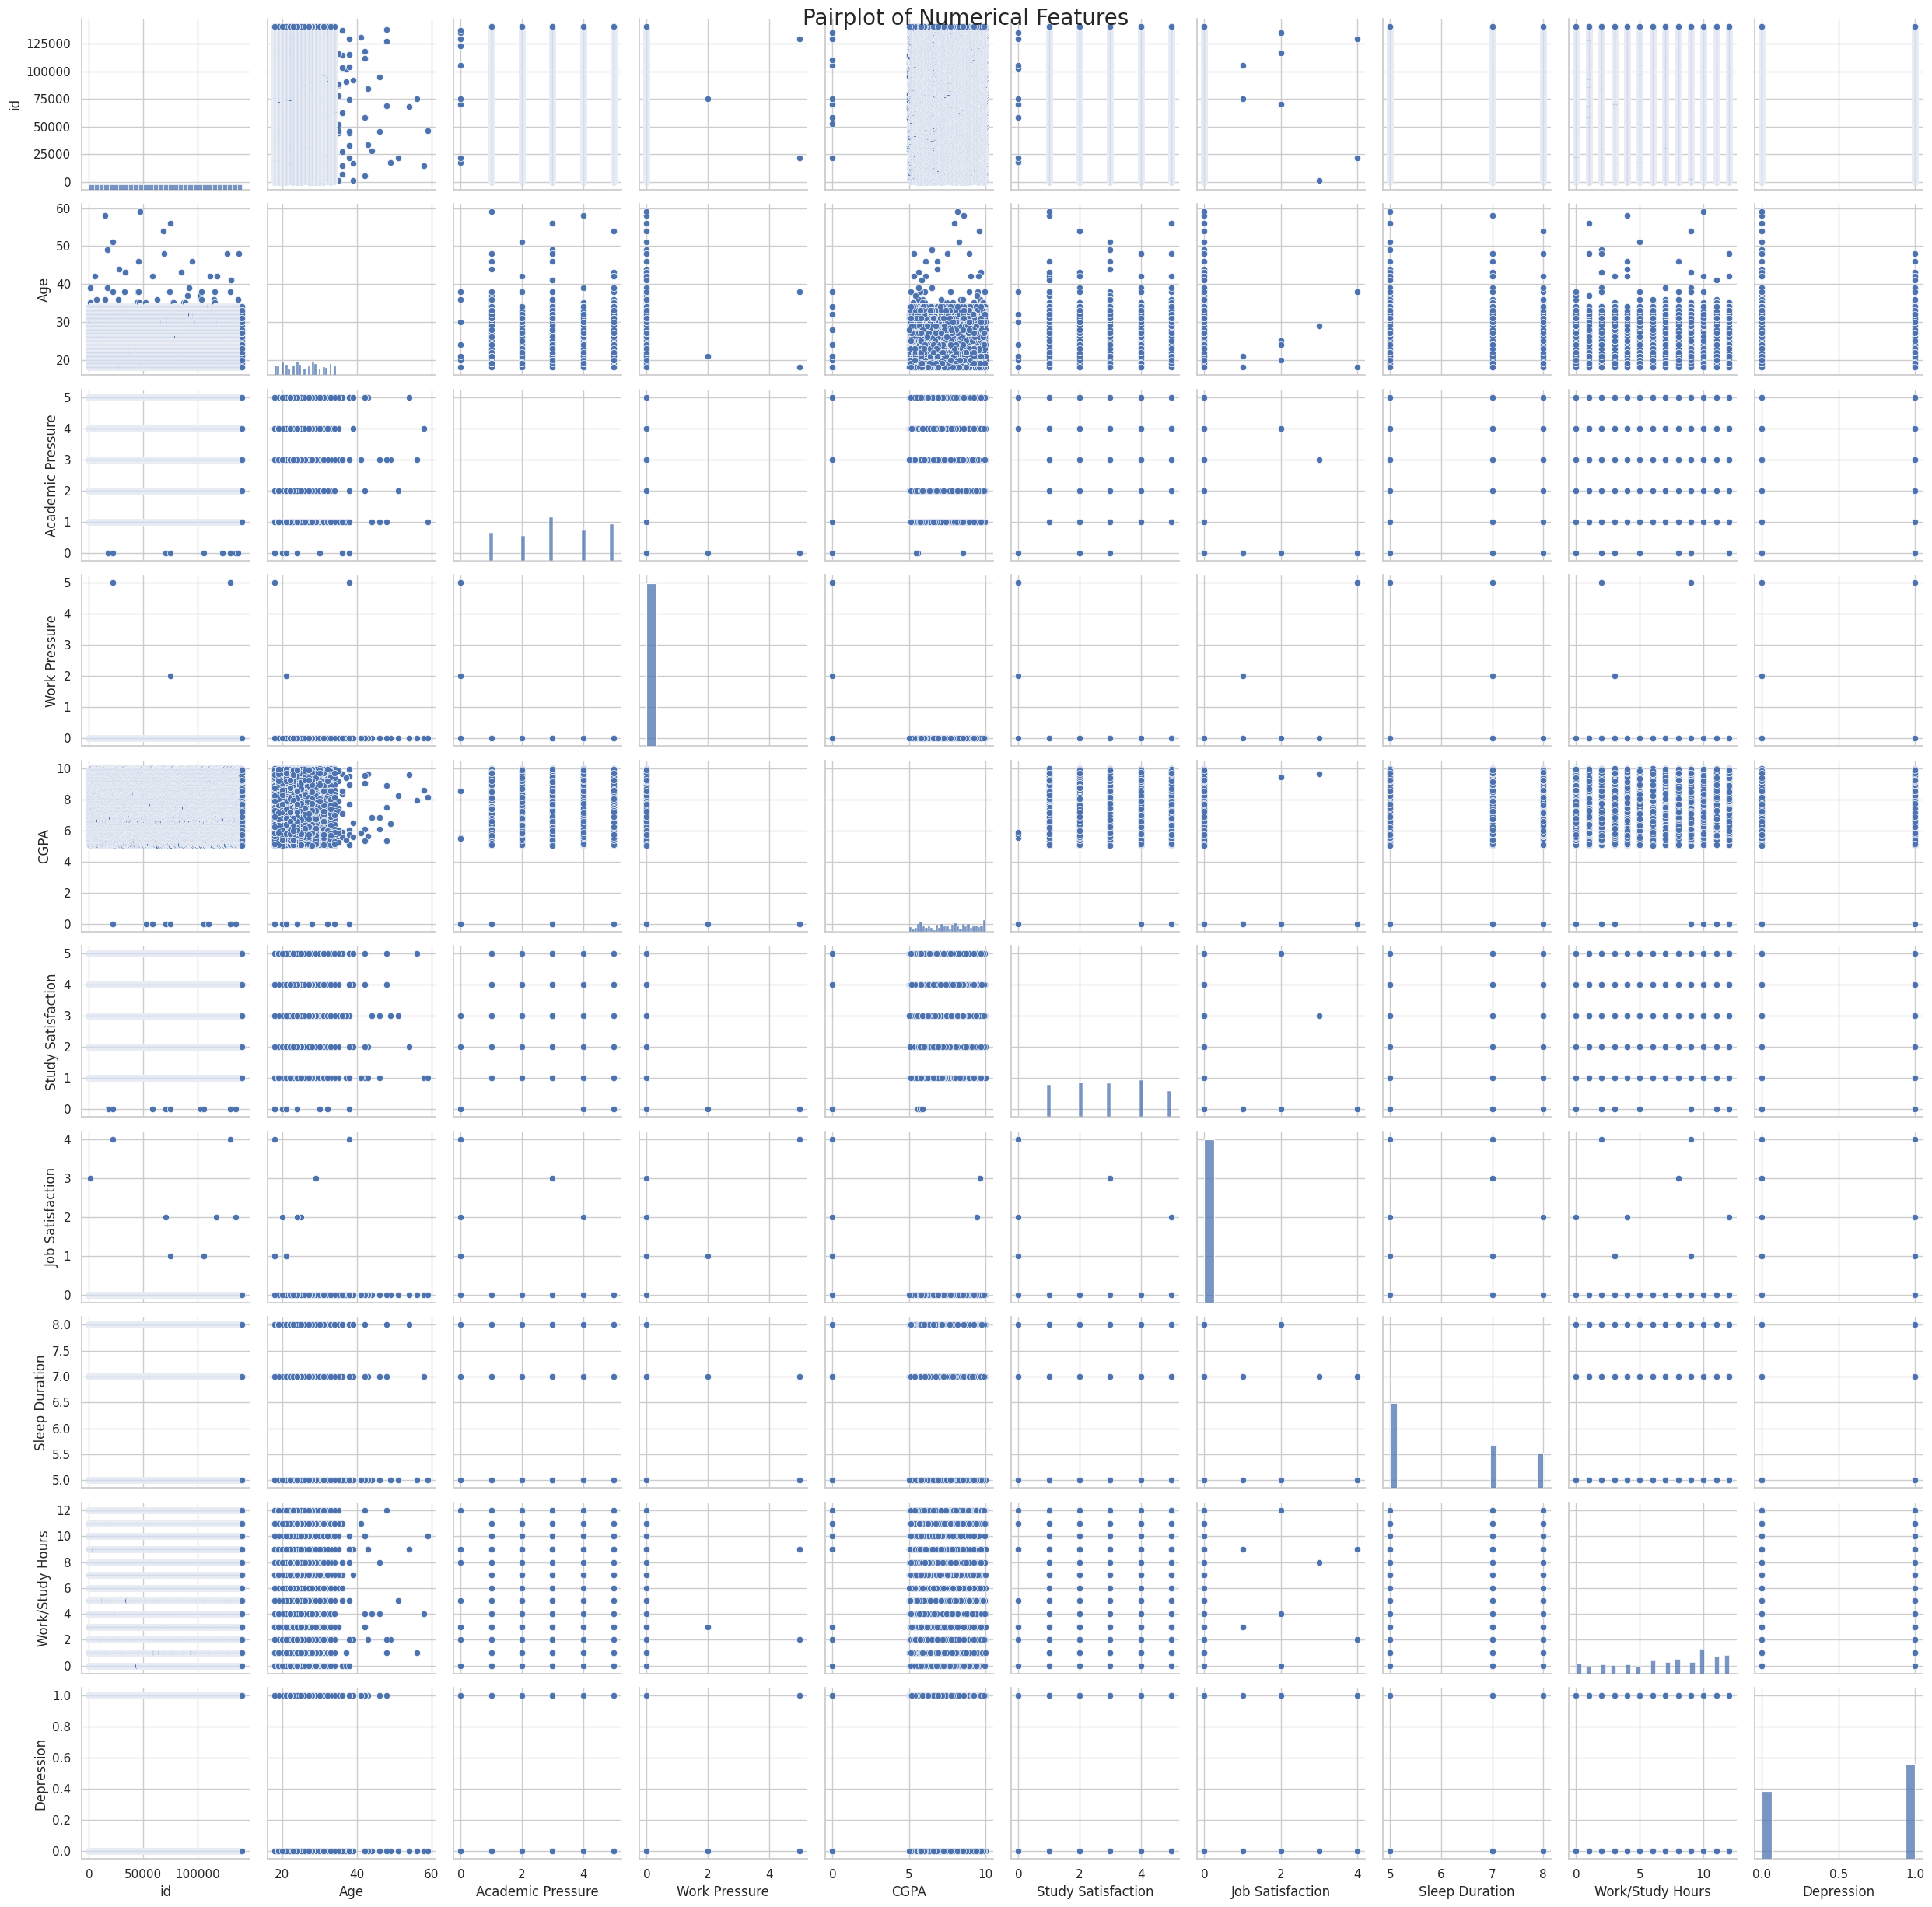

In [107]:

plt.figure(figsize=(20,14))
sns.pairplot(numerical_df)
plt.suptitle("Pairplot of Numerical Features", fontsize=20)
plt.tight_layout()
plt.show()